## #MILESTONE 1

#DATA CLEANING, PREPARATION, AND COMMUNICATION base on Card Table

#CARD TABLE

In [ ]:
import pandas as pd

In [ ]:
potter_url = 'https://docs.google.com/spreadsheets/d/1i0GuMSd75a0Y5ENaYVB1krchy_RU65i6/edit?usp=drive_link&ouid=103913184998663485520&rtpof=true&sd=true'
potter = 'https://drive.google.com/uc?id='+ potter_url.split('/')[-2]
df_card = pd.read_csv(potter)
df_card

,id,client_id,card_brand,card_number,expires,cvv,credit_limit,acct_open_date,year_pin_last_changed,days_since_last_trx,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M
0,0,1362,Amex,393314135668401,04/2030,866,Rp53.189.000,01/1996,2019,17,181.0,Rp177.057.300,NaN,NaN
1,1,550,Mastercard,5278231764792292,06/2030,396,Rp18.200.000,01/1999,2018,27,148.0,Rp135.687.100,NaN,NaN
2,2,556,Mastercard,5889825928297675,09/2027,422,Rp31.298.000,01/2000,2016,20,415.0,Rp186.723.300,NaN,NaN
3,3,1937,Visa,4289888672554714,04/2026,736,Rp25.732.000,01/2000,2020,7,148.0,Rp207.881.500,NaN,NaN
4,4,1981,Mastercard,5433366978583845,03/2030,530,Rp30.500.000,01/2002,2012,14,48.0,Rp28.007.500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,4508,1190,Visa,4227482000380763,07/2028,795,Rp7.301.000,09/2005,2012,5,320.0,Rp196.255.900,NaN,NaN
5595,209,1334,Visa,4144931322114018,02/2029,312,Rp14.592.000,01/2014,2014,32,41.0,Rp51.009.700,NaN,NaN
5596,2711,185,Visa,4718517475996018,01/2027,492,Rp8.943.000,04/2017,2017,14,198.0,Rp89.850.000,NaN,NaN
5597,1161,1891,Visa,4268017872699469,08/2031,476,Rp23.891.000,02/2013,2020,12,96.0,Rp43.768.500,NaN,NaN


###Question 4a Convert the correct data type in the “card” table dataset

In [ ]:
df_card.dtypes

,0
id,int64
client_id,int64
card_brand,object
card_number,int64
expires,object
cvv,int64
credit_limit,object
acct_open_date,object
year_pin_last_changed,int64
days_since_last_trx,int64


####4a.1. Convert the data types (client_id and id) from interger to object/string

In [ ]:
df_card['client_id'] = df_card['client_id'].astype(str)
df_card['id'] = df_card['id'].astype(str)
print(df_card[['client_id', 'id']].dtypes)

client_id    object
id           object
dtype: object


####4a.2. Change all count data types (count_nonfraud_trx_L6M and count_fraud_trx_L6M) from float to interger

In [ ]:
df_card['count_nonfraud_trx_L6M'] = df_card['count_nonfraud_trx_L6M'].fillna(0).astype(int)
df_card['count_fraud_trx_L6M'] = df_card['count_fraud_trx_L6M'].fillna(0).astype(int)
print(df_card[['count_nonfraud_trx_L6M', 'count_fraud_trx_L6M']].dtypes)

count_nonfraud_trx_L6M    int64
count_fraud_trx_L6M       int64
dtype: object


####4a.3. Change data related to money (credit_limit, amt_nonfraud_trx_L6M, amt_fraud_trx_L6M) from object to float

In [ ]:
df_card['credit_limit'] = df_card['credit_limit'].astype(str).str.replace('Rp', '', regex=False).str.replace('.', '', regex=False).astype(float)
df_card['amt_nonfraud_trx_L6M'] = df_card['amt_nonfraud_trx_L6M'].astype(str).str.replace('Rp', '', regex=False).str.replace('.', '', regex=False).astype(float)
df_card['amt_fraud_trx_L6M'] = df_card['amt_fraud_trx_L6M'].astype(str).str.replace('Rp', '', regex=False).str.replace('.', '', regex=False).fillna('0').astype(float)

In [ ]:
df_card.dtypes

,0
id,object
client_id,object
card_brand,object
card_number,int64
expires,object
cvv,int64
credit_limit,float64
acct_open_date,object
year_pin_last_changed,int64
days_since_last_trx,int64


####4a.4. Change all the datetime data (expires and acct_open_date) from object to timeseries

In [ ]:
df_card['expires'] = pd.to_datetime(df_card['expires'], format='%m/%Y')
df_card['acct_open_date'] = pd.to_datetime(df_card['acct_open_date'], format='%m/%Y')

print(df_card[['expires', 'acct_open_date']].dtypes)

expires           datetime64[ns]
acct_open_date    datetime64[ns]
dtype: object


###Question 4b Check the unique values in each column and see some typo data that either needs to be fixed or excluded (use value_counts())


Use check by function .value_counts() on column
Notes:
1.Primary key harus unik untuk tiap record, tidak boleh duplikat
2.Satu user bisa punya banyak kartu, duplikat diizinkan.
3.Atribut deskriptif, banyak kartu bisa sama merek, tp perlu diperhatikan ttg adanya typo di bagian card_brand Visa dan JCB
4.Nomor identitas kartu, harus unik per kartu.
5.Tanggal kadaluarsa bisa sama antar kartu.
6.CVV terkait kartu, tidak perlu indeks unik sendiri karena card_number sudah unik.
7.Tanggal pembukaan akun bisa sama.
8.Riwayat PIN, tidak unik.

####4b.1.Handling typos in the card_brand column, particularly for entries such as Visa and JCB, to ensure consistent spelling and avoid duplicate categories caused by misspellings or typo.

In [ ]:
df_card['card_brand'].value_counts()

,count
card_brand,
Mastercard,2826
Visa,2093
Amex,402
JCB,206
Visa,69
Jcb,3


In [ ]:
df_card['card_brand'] = df_card['card_brand'].replace({'Visa ': 'Visa', 'Jcb': 'JCB'})
df_card['card_brand'].value_counts()

,count
card_brand,
Mastercard,2826
Visa,2162
Amex,402
JCB,209


####4b.2.  As both id serve as unique identifiers within the dataset, ensuring that they contain no duplicate values is essential.The steps focus on correcting any inconsistencies or duplicates found in these columns.

In [ ]:
df_card.drop_duplicates(keep='first', subset=['id'], inplace=True)

In [ ]:
df_card

,id,client_id,card_brand,card_number,expires,cvv,credit_limit,acct_open_date,year_pin_last_changed,days_since_last_trx,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M
0,0,1362,Amex,393314135668401,2030-04-01,866,53189000.0,1996-01-01,2019,17,181,177057300.0,0,NaN
1,1,550,Mastercard,5278231764792292,2030-06-01,396,18200000.0,1999-01-01,2018,27,148,135687100.0,0,NaN
2,2,556,Mastercard,5889825928297675,2027-09-01,422,31298000.0,2000-01-01,2016,20,415,186723300.0,0,NaN
3,3,1937,Visa,4289888672554714,2026-04-01,736,25732000.0,2000-01-01,2020,7,148,207881500.0,0,NaN
4,4,1981,Mastercard,5433366978583845,2030-03-01,530,30500000.0,2002-01-01,2012,14,48,28007500.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,6141,715,Mastercard,5369522792349411,2028-08-01,597,57378000.0,2022-08-01,2024,604,0,NaN,0,NaN
5564,6142,1236,Mastercard,5791756986936871,2030-11-01,196,19178000.0,2024-12-01,2024,604,0,NaN,0,NaN
5565,6143,253,Mastercard,5482273460029161,2030-07-01,79,38739000.0,2024-12-01,2024,604,0,NaN,0,NaN
5566,6144,737,Mastercard,5413710543564908,2030-10-01,454,10355000.0,2024-12-01,2024,604,0,NaN,0,NaN


####4b.3. Same as id, card_number serve as unique identifiers too, ensuring again that they contain no duplicate values. The steps still focus on correcting any inconsistencies or duplicates in these columns.

In [ ]:
df_card.drop_duplicates(keep='first', subset=['card_number'], inplace=True)

In [ ]:
df_card

,id,client_id,card_brand,card_number,expires,cvv,credit_limit,acct_open_date,year_pin_last_changed,days_since_last_trx,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M
0,0,1362,Amex,393314135668401,2030-04-01,866,53189000.0,1996-01-01,2019,17,181,177057300.0,0,NaN
1,1,550,Mastercard,5278231764792292,2030-06-01,396,18200000.0,1999-01-01,2018,27,148,135687100.0,0,NaN
2,2,556,Mastercard,5889825928297675,2027-09-01,422,31298000.0,2000-01-01,2016,20,415,186723300.0,0,NaN
3,3,1937,Visa,4289888672554714,2026-04-01,736,25732000.0,2000-01-01,2020,7,148,207881500.0,0,NaN
4,4,1981,Mastercard,5433366978583845,2030-03-01,530,30500000.0,2002-01-01,2012,14,48,28007500.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,6141,715,Mastercard,5369522792349411,2028-08-01,597,57378000.0,2022-08-01,2024,604,0,NaN,0,NaN
5564,6142,1236,Mastercard,5791756986936871,2030-11-01,196,19178000.0,2024-12-01,2024,604,0,NaN,0,NaN
5565,6143,253,Mastercard,5482273460029161,2030-07-01,79,38739000.0,2024-12-01,2024,604,0,NaN,0,NaN
5566,6144,737,Mastercard,5413710543564908,2030-10-01,454,10355000.0,2024-12-01,2024,604,0,NaN,0,NaN


###Question 4c Check Missing Value

In [ ]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5568 entries, 0 to 5567
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      5568 non-null   object        
 1   client_id               5568 non-null   object        
 2   card_brand              5568 non-null   object        
 3   card_number             5568 non-null   int64         
 4   expires                 5568 non-null   datetime64[ns]
 5   cvv                     5568 non-null   int64         
 6   credit_limit            5556 non-null   float64       
 7   acct_open_date          5568 non-null   datetime64[ns]
 8   year_pin_last_changed   5568 non-null   int64         
 9   days_since_last_trx     5568 non-null   int64         
 10  count_nonfraud_trx_L6M  5568 non-null   int64         
 11  amt_nonfraud_trx_L6M    3684 non-null   float64       
 12  count_fraud_trx_L6M     5568 non-null   int64        

In [ ]:
df_card.isnull().sum()

,0
id,0
client_id,0
card_brand,0
card_number,0
expires,0
cvv,0
credit_limit,12
acct_open_date,0
year_pin_last_changed,0
days_since_last_trx,0


####4c.1. Filling missing value in credit_limit column

Cause the proportion of missing values in credit_limit is relatively small (12 out of 5599 entries), we can filling missing values with the median helps maintain the natural structure of the dataset without introducing artificial inflation or deflation in the credit limit values and median imputation is easy to implement and doesn’t require complex assumptions about the data distribution.

In [ ]:
median_credit_limit = df_card['credit_limit'].median()
df_card['credit_limit'] = df_card['credit_limit'].fillna(median_credit_limit)

In [ ]:
df_card.isnull().sum()

,0
id,0
client_id,0
card_brand,0
card_number,0
expires,0
cvv,0
credit_limit,0
acct_open_date,0
year_pin_last_changed,0
days_since_last_trx,0


###Question 4d Based on the card expiry date, remove all cards that have already expired and also exclude cards with a credit limit 0 (data calculated as May 31, 2025)

condition 1 >> remove all cards that have already expired by May 31, 2025
condition 2 >> exclude cards with credit_limit of 0,
Define reference date as May 31, 2025 for  checking card expiry to determine which cards are still valid (create a datetime object for May 31, 2025 as referance_date)

In [ ]:
reference_date = pd.to_datetime('2025-05-31')
print(f"Reference Date: {reference_date}")

Reference Date: 2025-05-31 00:00:00


In [ ]:
df_card_filtered = df_card[(df_card['expires'] >= reference_date) & (df_card['credit_limit'] > 0)]
print("First  5 rows of the filtered DataFrame:")
print(df_card_filtered.head())
print(f"\nShape of the filtered DataFrame: {df_card_filtered.shape}")

First  5 rows of the filtered DataFrame:
  id client_id  card_brand       card_number    expires  cvv  credit_limit  \
0  0      1362        Amex   393314135668401 2030-04-01  866    53189000.0   
1  1       550  Mastercard  5278231764792292 2030-06-01  396    18200000.0   
2  2       556  Mastercard  5889825928297675 2027-09-01  422    31298000.0   
3  3      1937        Visa  4289888672554714 2026-04-01  736    25732000.0   
4  4      1981  Mastercard  5433366978583845 2030-03-01  530    30500000.0   

  acct_open_date  year_pin_last_changed  days_since_last_trx  \
0     1996-01-01                   2019                   17   
1     1999-01-01                   2018                   27   
2     2000-01-01                   2016                   20   
3     2000-01-01                   2020                    7   
4     2002-01-01                   2012                   14   

   count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                     181        

**Before Filtering (Original Data Condition) :** The dataset contained all 5599 card records, including :
1.Cards that were already expired before May 31, 2025.
2.Cards with a credit limit of 0, meaning they were not usable for credit transactions.
**After Filtering (Cleaned Data Condition) :**
1.Only cards that expire on or after May 31, 2025 were kept.
2.Cards with credit_limit > 0 were retained.
3.The resulting dataset contains only valid, active, financially usable cards.



#DATA CLEANING, PREPARATION, AND COMMUNICATION base on User Table

#USER TABLE

In [ ]:
potter_url = 'https://docs.google.com/spreadsheets/d/1gXUl5g_jc6krDc8l8THEih7tkmSTh5fQ/edit?usp=drive_link&ouid=103913184998663485520&rtpof=true&sd=true'
potter = 'https://drive.google.com/uc?id='+ potter_url.split('/')[-2]
df_user = pd.read_csv(potter, encoding='latin1')
df_user

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score
0,825,66,1972-11-25,Female,Rp45.937.000,Rp93.663.000,Rp38.138.095,787
1,1746,68,1972-12-16,Female,Rp59.451.000,Rp121.212.000,Rp57.186.095,701
2,1718,67,1944-11-04,Female,Rp35.586.000,Rp52.535.000,Rp58.666,698
3,708,63,1963-01-12,Female,Rp255.975.000,Rp392.132.000,Rp60.467.238,722
4,1164,70,1982-09-21,Male,Rp84.407.000,Rp172.099.000,Rp54.946.285,675
...,...,...,...,...,...,...,...,...
1995,986,70,1993-07-06,Male,Rp36.950.000,Rp75.328.000,Rp26.250.666,703
1996,1944,65,1963-11-12,Female,Rp37.998.000,Rp77.474.000,Rp31.224.571,740
1997,185,67,1979-01-30,Female,Rp23.810.000,Rp48.548.000,Rp21.238.666,779
1998,1007,60,1960-02-23,Male,Rp39.752.000,Rp85.752.000,Rp8.141.142,618


###Question 5a.1 Convert the correct data type in the “user” table dataset



#### # #5a.1.a Change the data types "id" from int64 to object

In [ ]:
df_user.dtypes

,0
id,int64
retirement_age,int64
birthdate,object
gender,object
per_capita_income,object
yearly_income,object
total_debt,object
credit_score,int64


In [ ]:
df_user['id'] = df_user['id'].astype(str)

In [ ]:
df_user.dtypes

,0
id,object
retirement_age,int64
birthdate,object
gender,object
per_capita_income,object
yearly_income,object
total_debt,object
credit_score,int64


#### # #5a.1.b. Change the data types "birthdate" from int64 to object


In [ ]:
df_user['birthdate'] = pd.to_datetime(df_user['birthdate'], format='%Y-%m-%d')

In [ ]:
df_user.dtypes

,0
id,object
retirement_age,int64
birthdate,datetime64[ns]
gender,object
per_capita_income,object
yearly_income,object
total_debt,object
credit_score,int64


#### # #5a.1.c.  Change the data types ("per_capita_income", "yearly_income" and "total_debt") from object to float


In [ ]:
df_user['per_capita_income'] = df_user['per_capita_income'].str.replace('Rp', '').str.replace('.', '', regex=False).astype(float)
df_user['yearly_income'] = df_user['yearly_income'].str.replace('Rp', '').str.replace('.', '', regex=False).astype(float)
df_user['total_debt'] = df_user['total_debt'].str.replace('Rp', '').str.replace('.', '', regex=False).astype(float)

In [ ]:
df_user.dtypes

,0
id,object
retirement_age,int64
birthdate,datetime64[ns]
gender,object
per_capita_income,float64
yearly_income,float64
total_debt,float64
credit_score,int64


####5a.2. Check the unique values in each column and see some typo data that either needs to be fixed or excluded (use value_counts())


In [ ]:
df_user.columns

Index(['id', 'retirement_age', 'birthdate', 'gender', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score'],
      dtype='object')

Based on the information provided in the data dictionary, we can conclude the following :
1. **The id column** is a row identifier and serves as the Primary Key, meaning it must not contain any null values or duplicates.
2. The retirement_age column is a profile attribute, not an identifier.
3. The birthdate column will naturally contain many duplicate values because multiple individuals can be born on the same date.
4. **The gender column** is a demographic attribute, so duplicates are allowed however, potential typos or inconsistent labels should be checked
5. The per_capita_income, yearly_income, and total_debt columns represent financial values and are not identifiers, so duplicates are acceptable.
6. The credit_score column represents a scoring metric, and it is normal for different users to have the same score.


In [ ]:
df_user['id'].value_counts()

,count
id,
1528,1
1735,1
1284,1
1805,1
1616,1
...,...
1164,1
708,1
1718,1


1. All IDs Are Unique
Each value in the id column appears exactly once (count = 1), confirming that all 2000 rows have distinct identifiers. This validates that the id column functions as a proper Primary Key.
2. No Duplicates or Nulls. There are no duplicate or missing values in the id column, indicating strong data integrity. This ensures reliable operations for indexing, joining tables, or tracking user level behavior.
3. Well structured dataset
With unique IDs, we can be confident that each row represents a single user entity, eliminating risks of double-counting or incorrect data merges.


In [ ]:
df_user['gender'].value_counts()

,count
gender,
Female,1016
Male,984


No Missing or Unexpected Values
Only two categories are present : "Female" and "Male". There are no null values or unexpected entries like "Unknown", "Other", or typos.. This indicates good data quality for the gender column, since the gender distribution is balanced, demographic analysis (example transaction behavior, fraud risk, or product preferences by gender) can be conducted without bias toward one group.

####5a.3. cek missing value

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2000 non-null   object        
 1   retirement_age     2000 non-null   int64         
 2   birthdate          2000 non-null   datetime64[ns]
 3   gender             2000 non-null   object        
 4   per_capita_income  2000 non-null   float64       
 5   yearly_income      2000 non-null   float64       
 6   total_debt         2000 non-null   float64       
 7   credit_score       2000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 125.1+ KB


1. No Missing Values
All columns contain 2000 non null entries, indicating that the dataset is complete and does not require any imputation or initial cleaning.
2. Appropriate Data Types
a. birthdate is correctly stored as datetime64[ns], making it suitable for age calculations and time based segmentation.
b. Financial columns like per_capita_income, yearly_income, and total_debt are in float64 format, ready for aggregation and analysis.
c. credit_score and retirement_age are in int64, appropriate for numerical modeling and classification.

###Question 5b Add age, retired flag and DTI (debt to income ratio) column by using logics

####5b.1 Add "Age" column by logics user's age from their "birthdate" until the analysis cutoff date as 31 May 2025

In [ ]:
analysis_cutoff_date = pd.to_datetime('2025-05-31')
df_user['age'] = (analysis_cutoff_date - df_user['birthdate']).dt.days / 365.25
df_user['age'] = df_user['age'].astype(int)
display(df_user.head())

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42


####5b.2 Add "retired_flag" column by logics users whose "age" is not less than the "retirement_age" (to create the column use .loc method or simpler using "np.where")

In [ ]:
import numpy as np
df_user['retired_flag'] = np.where(df_user['age'] >= df_user['retirement_age'], 1, 0)
display(df_user.head())

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,0
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,0
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,1
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,0
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,0


####5b.3 Add "DTI" (debt-to-income-ratio) column by logics the ratio between "total debt" and "yearly_income" as total income.

In [ ]:
df_user['DTI'] = df_user['total_debt'] / df_user['yearly_income']
display(df_user.head())

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag,DTI
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,0,0.407184
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,0,0.471786
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,1,0.001117
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,0,0.154201
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,0,0.319271


####Verify the new features added to the user table dataset
Display the first few rows of 'df_user' to inspect the newly added 'age', 'retired_flag', and 'DTI' columns, and check the DataFrame's information to confirm their data types. To verify the new features, need to display the head of the 'df_user' DataFrame to visually inspect the new columns and then use '.info()' to confirm their data types, as specified in the instructions.


In [ ]:
print("First 5 rows of df_user with new features:")
display(df_user.head())

print("\nDataFrame information with new features:")
df_user.info()

First 5 rows of df_user with new features:


,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag,DTI
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,0,0.407184
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,0,0.471786
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,1,0.001117
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,0,0.154201
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,0,0.319271



DataFrame information with new features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2000 non-null   object        
 1   retirement_age     2000 non-null   int64         
 2   birthdate          2000 non-null   datetime64[ns]
 3   gender             2000 non-null   object        
 4   per_capita_income  2000 non-null   float64       
 5   yearly_income      2000 non-null   float64       
 6   total_debt         2000 non-null   float64       
 7   credit_score       2000 non-null   int64         
 8   age                2000 non-null   int64         
 9   retired_flag       2000 non-null   int64         
 10  DTI                2000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 172.0+ KB


#MILESTONE 2

###Question 6a Calculate the total net profit from all transaction in the last 6 months (Hint: net profit means all MDR fee profit minus all fraud amount. Calculate MDR fee profit by multiplying the MDR fee rate and total sales amount. Then, substract total fraud amount from that result)

Set a default MDR (Merchant Discount Rate) fee rate, for instance, 1.5% for the calculation. This rate will be used to determine the MDR fee profit from non-fraudulent transactions.


In [ ]:
mdr_fee_rate = 0.015
print(f"MDR Fee Rate set to: {mdr_fee_rate*100}%")

MDR Fee Rate set to: 1.5%


In [ ]:
total_nonfraud_sales = df_card_filtered['amt_nonfraud_trx_L6M'].fillna(0).sum()
print(f"Total non-fraudulent sales in last 6 months: {total_nonfraud_sales}")

Total non-fraudulent sales in last 6 months: 455863486600.0


In [ ]:
mdr_fee_profit = total_nonfraud_sales * mdr_fee_rate
print(f"MDR Fee Profit: {mdr_fee_profit}")

MDR Fee Profit: 6837952299.0


In [ ]:
df_card_filtered['amt_fraud_trx_L6M'] = pd.to_numeric(df_card_filtered['amt_fraud_trx_L6M'], errors='coerce').fillna(0)
total_fraud_amount = df_card_filtered['amt_fraud_trx_L6M'].sum()
print(f"Total fraud amount in last 6 months: {total_fraud_amount}")

Total fraud amount in last 6 months: 1013378300.0


/tmp/ipython-input-1493433811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_card_filtered['amt_fraud_trx_L6M'] = pd.to_numeric(df_card_filtered['amt_fraud_trx_L6M'], errors='coerce').fillna(0)


In [ ]:
net_profit = mdr_fee_profit - total_fraud_amount
print(f"Total Net Profit in last 6 months: {net_profit}")

Total Net Profit in last 6 months: 5824573999.0


In [ ]:
print(f"The total net profit from all transactions in the last 6 months is: {net_profit}")

The total net profit from all transactions in the last 6 months is: 5824573999.0


The total net profit from all transactions in the last 6 months is 5,824,573,999.0

*   The MDR (Merchant Discount Rate) fee was set at 1.5%.
*   The total non-fraudulent sales in the last 6 months amounted to 455,863,486,600.0
*   The calculated MDR fee profit was 6,837,952,299.0
*   The total fraudulent amount recorded for the last 6 months was 1,013,378,300.0
*   The final net profit, after subtracting fraud from MDR fee profit, was 5,824,573,999.0


###Question 6b Calculate the fraud rate of RevoBank. Fraud rate is the percentage of fraud amount from overall transaction volume (Hint: Calculate total fraud and nonfraud amount, and divide total fraud by total all amounts to get the fraud rate), use pie chart to visualise the result)

In [ ]:
total_transaction_volume = total_fraud_amount + total_nonfraud_sales
print(f"Overall transaction volume in last 6 months: {total_transaction_volume}")

Overall transaction volume in last 6 months: 456876864900.0


In [ ]:
fraud_rate = (total_fraud_amount / total_transaction_volume) * 100
print(f"Fraud rate of RevoBank in last 6 months: {fraud_rate:.2f}%")

Fraud rate of RevoBank in last 6 months: 0.22%


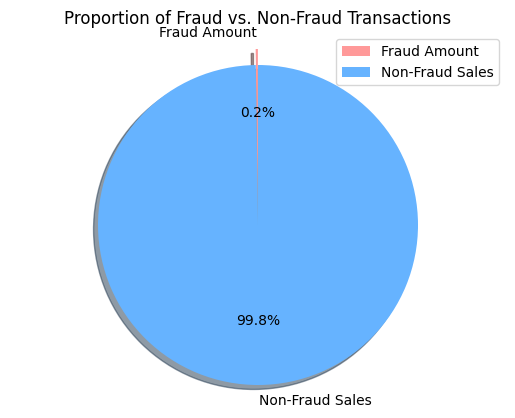

In [ ]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Fraud Amount', 'Non-Fraud Sales']
sizes = [total_fraud_amount, total_nonfraud_sales]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # Explode the 1st slice (Fraud Amount)

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of Fraud vs. Non-Fraud Transactions')
plt.legend(labels, loc='best') # Add a legend
plt.show()

The calculated fraud rate for RevoBank is 0.22%.

*   The overall transaction volume for RevoBank in the last 6 months was \$456,876,864,900.0.
*   The fraud rate for RevoBank in the last 6 months was 0.22%.




###Question 6c See the difference in transaction behaviour per card brand (Hint:Group by card brand and calculate average of transaction count and amount).

To analyze transaction behavior by card brand, group the 'df_card_filtered' DataFrame by 'card_brand' and calculate the average of the specified transaction count and amount columns. To visualize the average non-fraudulent transaction counts per card brand, create a bar chart for 'count_nonfraud_trx_L6M' from the 'df_card_brand_avg' DataFrame. This will help in easily comparing the transaction frequencies across different card brands.



In [ ]:
df_card_brand_avg = df_card_filtered.groupby('card_brand')[['count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M', 'count_fraud_trx_L6M', 'amt_fraud_trx_L6M']].mean()
display(df_card_brand_avg)

,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M
card_brand,,,,
Amex,112.941624,1.492264e+08,0.126904,207462.944162
JCB,84.395122,1.114518e+08,0.136585,185500.000000
Mastercard,121.933523,1.209153e+08,0.118379,191013.579808
Visa,116.055293,1.243378e+08,0.117202,168378.638941


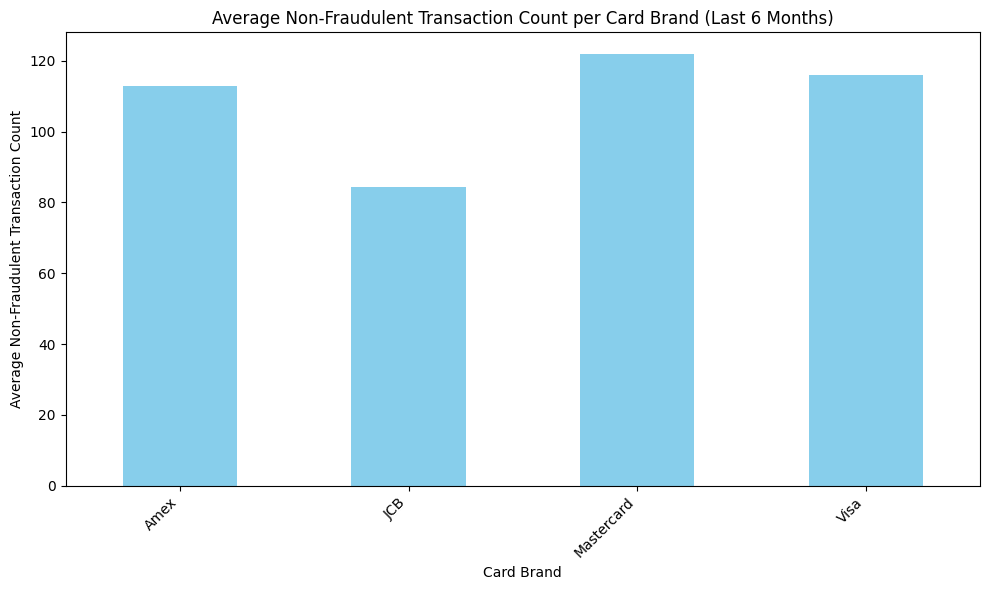

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_card_brand_avg['count_nonfraud_trx_L6M'].plot(kind='bar', color='skyblue')
plt.title('Average Non-Fraudulent Transaction Count per Card Brand (Last 6 Months)')
plt.xlabel('Card Brand')
plt.ylabel('Average Non-Fraudulent Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

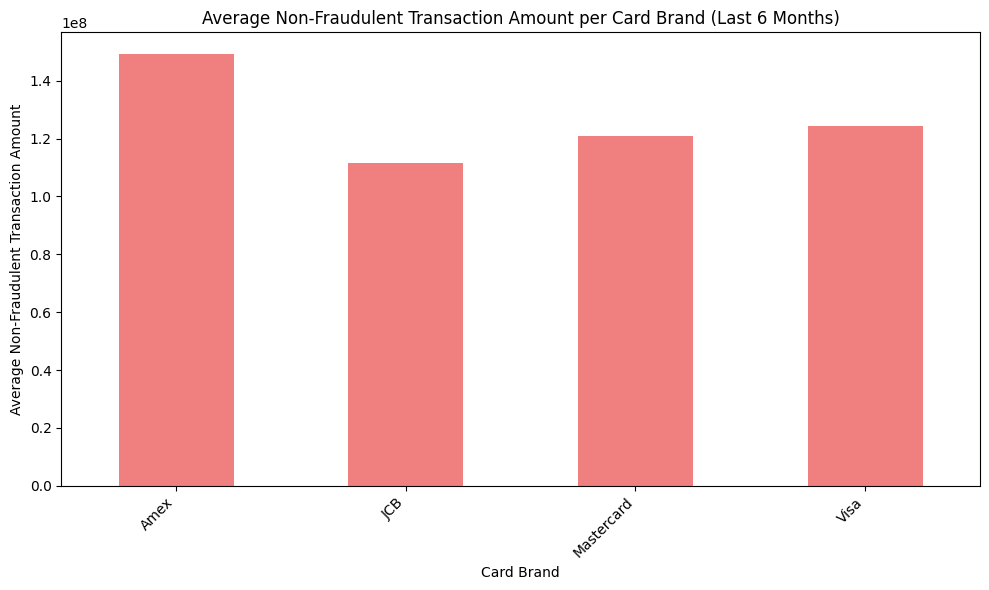

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_card_brand_avg['amt_nonfraud_trx_L6M'].plot(kind='bar', color='lightcoral')
plt.title('Average Non-Fraudulent Transaction Amount per Card Brand (Last 6 Months)')
plt.xlabel('Card Brand')
plt.ylabel('Average Non-Fraudulent Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

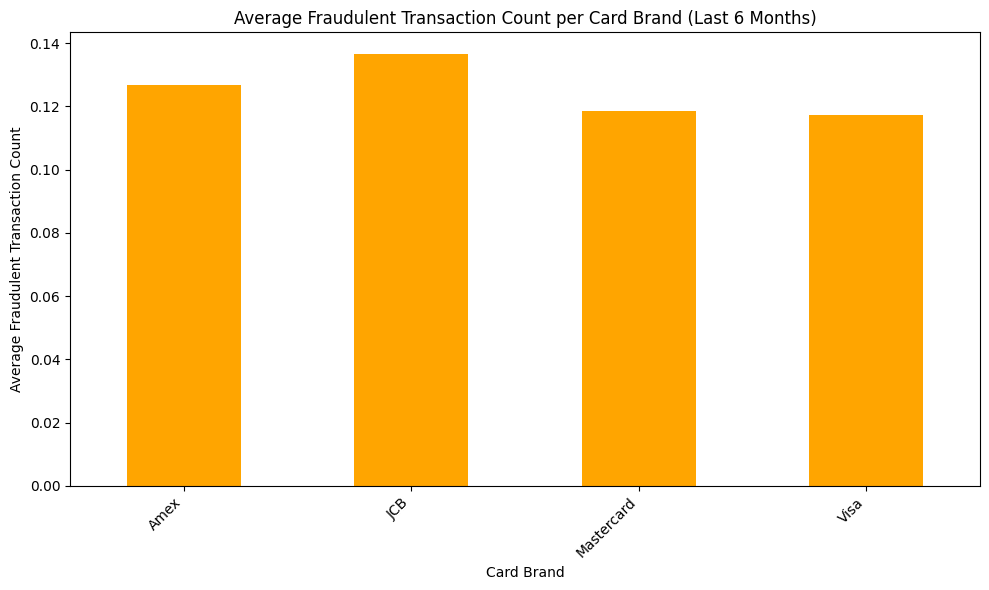

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_card_brand_avg['count_fraud_trx_L6M'].plot(kind='bar', color='orange')
plt.title('Average Fraudulent Transaction Count per Card Brand (Last 6 Months)')
plt.xlabel('Card Brand')
plt.ylabel('Average Fraudulent Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

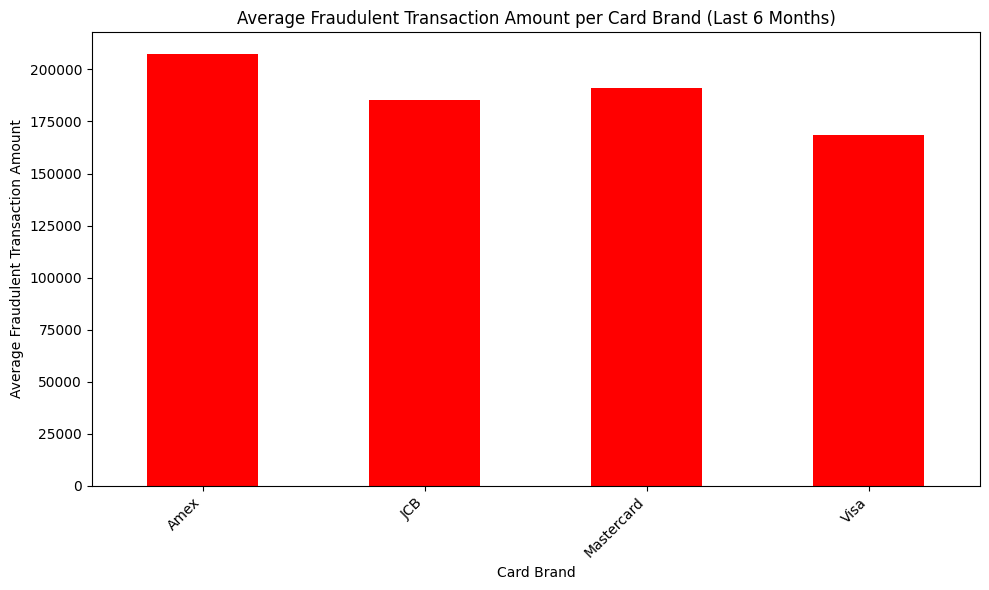

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_card_brand_avg['amt_fraud_trx_L6M'].plot(kind='bar', color='red')
plt.title('Average Fraudulent Transaction Amount per Card Brand (Last 6 Months)')
plt.xlabel('Card Brand')
plt.ylabel('Average Fraudulent Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Based on the analysis of average transaction counts and amounts for both non-fraudulent and fraudulent activities across different card brands, the following key differences are observed:

**1. Non-Fraudulent Transactions:**
*   **Mastercard** generally shows the highest average non-fraudulent transaction count, indicating a higher frequency of use for legitimate purchases.
*   In terms of average non-fraudulent transaction amount, **Amex** appears to have the highest average value, suggesting that Amex cards are used for larger purchases on average. Mastercard and Visa follow with comparable average amounts, while JCB has the lowest.

**2. Fraudulent Transactions:**
*   **Amex** tends to have a slightly higher average fraudulent transaction count, though the differences across brands are not extremely pronounced. This could suggest Amex cards are targeted more frequently for fraudulent attempts.
*   Similar to non-fraudulent transactions, **Amex** also shows the highest average fraudulent transaction amount. This implies that when fraud occurs with Amex cards, it often involves higher individual transaction values.

**Overall Insights:**
*   There's a notable pattern where **Amex** cards, despite having a lower frequency of non-fraudulent transactions compared to Mastercard, tend to have higher average transaction values for both non-fraudulent and fraudulent activities. This could indicate that Amex users generally conduct higher-value transactions, which also translates to higher-value fraud incidents.
*   **Mastercard** shows the highest volume (count) of non-fraudulent transactions, but its average transaction amount (both non-fraud and fraud) is not the highest, suggesting a broad user base engaging in a mix of transaction sizes.
*   **Visa** is consistently in the mid-range for both counts and amounts, reflecting its widespread acceptance and diverse user base.
*   **JCB** generally exhibits the lowest average counts and amounts for both types of transactions, which might be due to its more limited market presence compared to the other major brands.

###Question 6d Compare the debt to income ratios of retired vs non retired users. The debt to income ratio definition is the total debt per yearly income (Hint: Group data by retired_flag and use agregate statistics to check the difference in debt to income ratios between retired vs non retired users, by need to calculate the debt to income ratio first.

In [ ]:
dti_stats = df_user.groupby('retired_flag')['DTI'].agg(['mean', 'median', 'std'])
display(dti_stats)

,mean,median,std
retired_flag,,,
0,0.295747,0.297170,0.153898
1,0.067158,0.044024,0.070973


To visualize the distribution of DTI ratios for retired and non-retired users, a boxplot is an effective choice, use 'seaborn.boxplot' for this purpose, as it provides good aesthetics and handles grouping easily.



/tmp/ipython-input-3480851374.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='retired_flag', y='DTI', data=df_user, palette='viridis')


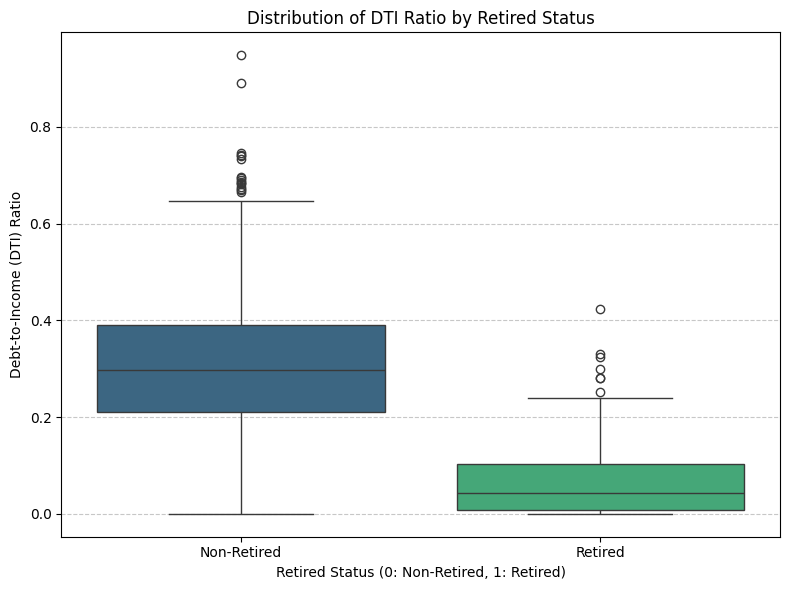

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='retired_flag', y='DTI', data=df_user, palette='viridis')
plt.title('Distribution of DTI Ratio by Retired Status')
plt.xlabel('Retired Status (0: Non-Retired, 1: Retired)')
plt.ylabel('Debt-to-Income (DTI) Ratio')
plt.xticks(ticks=[0, 1], labels=['Non-Retired', 'Retired'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The previous code produced a 'FutureWarning' regarding the 'palette' argument without 'hue'. To suppress this warning and ensure future compatibility, I will explicitly set 'hue' to 'retired_flag' and 'legend' to 'False' in the 'sns.boxplot' call, as suggested by the warning.



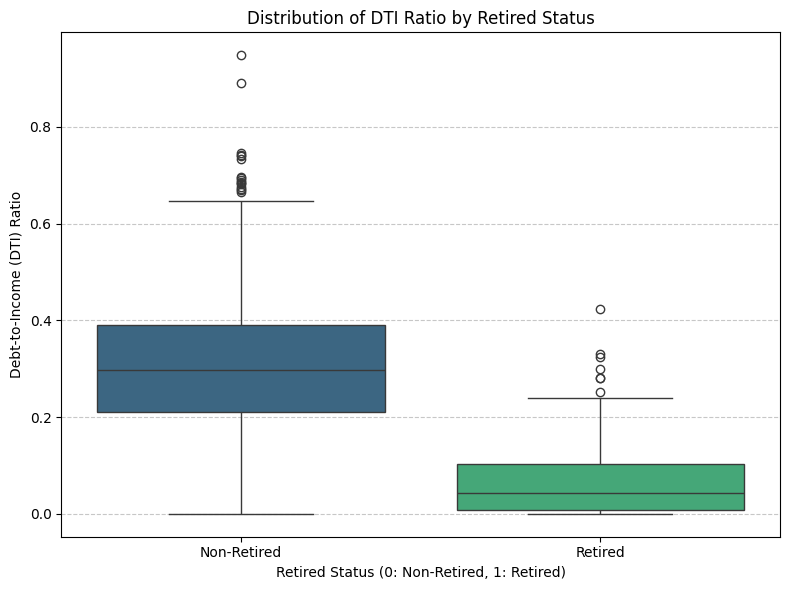

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='retired_flag', y='DTI', data=df_user, palette='viridis', hue='retired_flag', legend=False)
plt.title('Distribution of DTI Ratio by Retired Status')
plt.xlabel('Retired Status (0: Non-Retired, 1: Retired)')
plt.ylabel('Debt-to-Income (DTI) Ratio')
plt.xticks(ticks=[0, 1], labels=['Non-Retired', 'Retired'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Comparison of DTI Ratios: Retired vs. Non-Retired Users

The boxplot visually confirms and enhances the observations made from the aggregate statistics regarding the Debt-to-Income (DTI) ratios between retired and non-retired users.

**Visual Analysis from Boxplot:**
*   **Non-Retired Users (retired_flag = 0):** The boxplot for non-retired users shows a higher median DTI and a wider interquartile range (IQR), indicating a greater spread and generally higher DTI values. The box is positioned higher on the y-axis, confirming that this group carries substantially more debt relative to their income. There are also a number of outliers, suggesting some non-retired individuals have exceptionally high DTI ratios.
*   **Retired Users (retired_flag = 1):** The boxplot for retired users is significantly lower on the y-axis, with a much smaller median and a narrower IQR. This indicates that the majority of retired individuals have very low DTI ratios, demonstrating a much more conservative financial profile concerning debt. The presence of fewer and lower outliers also suggests a more consistent and lower debt burden across this group.

**Quantitative Analysis (from previous aggregate statistics):**
*   **Non-Retired Users:** Mean DTI: ~0.296, Median DTI: ~0.297, Standard Deviation DTI: ~0.154.
*   **Retired Users:** Mean DTI: ~0.067, Median DTI: ~0.044, Standard Deviation DTI: ~0.071.

**Key Differences and Implications:**
1.  **Substantial DTI Disparity:** Both the boxplot and statistics clearly show a large difference in DTI ratios, with non-retired users having a DTI that is roughly 4-5 times higher on average than retired users.
2.  **Financial Stability in Retirement:** The lower DTI for retired individuals suggests a general trend of reduced debt burden as people approach and enter retirement. This could be due to paying off mortgages, reducing consumer debt, or living on more stable, fixed incomes that require less credit utilization.
3.  **Risk Assessment for Lenders:** For financial institutions, retired individuals, on average, represent a lower credit risk in terms of their debt servicing capacity. Non-retired individuals, especially those with higher DTI outliers, might require more stringent credit assessments.
4.  **Distribution Shape:** The boxplot visually supports the right-skewness observed for retired users (median lower than mean), indicating that while most have very low DTI, a few may still carry some debt. For non-retired users, the distribution appears more symmetrical around the median/mean.

In conclusion, the analysis consistently highlights that retired individuals, as a group, exhibit significantly lower and more stable Debt-to-Income ratios compared to non-retired individuals, underscoring a generally improved financial position regarding debt management.

#MERGE THE CARD DATA DAN USER DATA

Merge the card data dan user data. Make sure data is grouped by client ID (1 user can have multiple cards), recency data takes the most recent number (choose the smallest number), sum all the monetary and count columns, and exclude all non important column.

Group the 'df_card_filtered' DataFrame by 'client_id'. For each client, sum up 'credit_limit', 'count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M', 'count_fraud_trx_L6M', and 'amt_fraud_trx_L6M'. Additionally, find the minimum value for 'days_since_last_trx' and rename this column to 'recency'.

To fulfill the subtask, group the 'df_card_filtered' DataFrame by 'client_id' and apply aggregation functions as specified summing the financial and count columns, and finding the minimum for 'days_since_last_trx' which will be renamed to 'recency'.




In [ ]:
df_card_agg = df_card_filtered.groupby('client_id').agg(
    credit_limit=('credit_limit', 'sum'),
    count_nonfraud_trx_L6M=('count_nonfraud_trx_L6M', 'sum'),
    amt_nonfraud_trx_L6M=('amt_nonfraud_trx_L6M', 'sum'),
    count_fraud_trx_L6M=('count_fraud_trx_L6M', 'sum'),
    amt_fraud_trx_L6M=('amt_fraud_trx_L6M', 'sum'),
    recency=('days_since_last_trx', 'min')
).reset_index()

display(df_card_agg.head())
display(df_card_agg.info())

,client_id,credit_limit,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M,recency
0,0,165775000.0,685,535262100.0,0,0.0,3
1,1,65592000.0,498,264007900.0,0,0.0,20
2,10,108249000.0,0,0.0,0,0.0,604
3,100,236386000.0,366,295701900.0,0,0.0,5
4,1000,36225000.0,0,0.0,0,0.0,604


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938 entries, 0 to 1937
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   client_id               1938 non-null   object 
 1   credit_limit            1938 non-null   float64
 2   count_nonfraud_trx_L6M  1938 non-null   int64  
 3   amt_nonfraud_trx_L6M    1938 non-null   float64
 4   count_fraud_trx_L6M     1938 non-null   int64  
 5   amt_fraud_trx_L6M       1938 non-null   float64
 6   recency                 1938 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 106.1+ KB


None

The next step is to merge the aggregated card data ('df_card_agg') with the user data ('df_user') based on the common client identifier. This will combine the card related metrics with the user demographic and financial information.



In [ ]:
df_merged = pd.merge(df_user, df_card_agg, left_on='id', right_on='client_id', how='inner')

print("First 5 rows of the merged DataFrame:")
display(df_merged.head())

print("\nInformation about the merged DataFrame:")
df_merged.info()

First 5 rows of the merged DataFrame:


,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag,DTI,client_id,credit_limit,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M,recency
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,0,0.407184,825,164867000.0,599,755489800.0,1,-7421400.0,10
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,0,0.471786,1746,102033000.0,189,388726600.0,0,0.0,24
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,1,0.001117,1718,209210000.0,1322,705750600.0,0,0.0,4
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,0,0.154201,708,558975000.0,378,897483900.0,0,0.0,4
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,0,0.319271,1164,54758000.0,496,763527700.0,0,0.0,21



Information about the merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938 entries, 0 to 1937
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      1938 non-null   object        
 1   retirement_age          1938 non-null   int64         
 2   birthdate               1938 non-null   datetime64[ns]
 3   gender                  1938 non-null   object        
 4   per_capita_income       1938 non-null   float64       
 5   yearly_income           1938 non-null   float64       
 6   total_debt              1938 non-null   float64       
 7   credit_score            1938 non-null   int64         
 8   age                     1938 non-null   int64         
 9   retired_flag            1938 non-null   int64         
 10  DTI                     1938 non-null   float64       
 11  client_id               1938 non-null   object        
 12  credit_

The successful merge of the card and user data resulted in 'df_merged', a DataFrame with 1938 entries and 18 columns. This DataFrame combines user-specific information from 'df_user with aggregated card activity data from df_card_agg'.

The aggregated columns from the card data now present in 'df_merged' are: 'credit_limit' (summed), 'count_nonfraud_trx_L6M' (summed), 'amt_nonfraud_trx_L6M' (summed), 'count_fraud_trx_L6M' (summed), 'amt_fraud_trx_L6M' (summed), and 'recency' (minimum 'days_since_last_trx').

*   The 'df_card_filtered' DataFrame was successfully aggregated by 'client_id', resulting in 'df_card_agg' with 1938 entries and 7 columns.
*   The aggregation involved summing 'credit_limit', 'count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M', 'count_fraud_trx_L6M', and 'amt_fraud_trx_L6M' for each client.
*   The minimum 'days_since_last_trx' was calculated and renamed to 'recency' for each client.
*   The 'df_user' DataFrame was successfully merged with 'df_card_agg' using an inner join on 'df_user['id']' and 'df_card_agg['client_id']'.
*   The final 'df_merged' DataFrame contains 1938 entries and 18 columns, integrating both user demographics and the aggregated card transaction metrics.

Condition for next step
*   The 'df_merged' DataFrame now provides a comprehensive view of each client, combining demographic information with their aggregated card usage and fraud-related statistics, which is crucial for client-centric analysis.
*   This integrated dataset is ready for further analysis, such as building predictive models for customer behavior, fraud detection, or credit risk assessment, by leveraging the combined features.


###Question 6e Calculate the average of Debt to income ratio (DTI) based on credit score category (poor, fair, good, very good, exceptional). Hint: Use pd.cut to categorise the credit score into different scoring also add the breakdown of the transaction behaviour (transaction count and transaction amount)


The user is asking to calculate and visualize the average Debt-to-Income (DTI) ratio and transaction behavior (counts and amounts for non-fraudulent and fraudulent transactions) based on different credit score categories. The credit scores should be categorized into "Poor", "Fair", "Good", "Very Good", and "Exceptional" using 'pd.cut'.

Therefore, the task is:
Calculate the average Debt-to-Income (DTI) ratio, average non fraudulent transaction count and amount, and average fraudulent transaction count and amount for each credit score category (Poor, Fair, Good, Very Good, Exceptional) from the 'df_merged' DataFrame, visualize these averages using bar charts, and summarize the key insights.

####Define Credit Score Categories
Define the bins and labels for credit score categories (Poor, Fair, Good, Very Good, Exceptional) based on standard credit score ranges. To define the credit score categories, I will first define the numerical bins for the credit score ranges and then the corresponding string labels, as specified in the instructions.


In [ ]:
bins = [0, 579, 669, 739, 799, 850]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

print(f"Credit Score Bins: {bins}")
print(f"Credit Score Labels: {labels}")

Credit Score Bins: [0, 579, 669, 739, 799, 850]
Credit Score Labels: ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']


Now that the bins and labels for credit score categories are defined, use 'pd.cut' to categorize the 'credit_score' column in 'df_merged' into these defined categories and store them in a new column called 'credit_score_category'.



In [ ]:
df_merged['credit_score_category'] = pd.cut(df_merged['credit_score'], bins=bins, labels=labels, right=True, include_lowest=True)
display(df_merged.head())

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag,DTI,client_id,credit_limit,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M,recency,credit_score_category
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,0,0.407184,825,164867000.0,599,755489800.0,1,-7421400.0,10,Very Good
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,0,0.471786,1746,102033000.0,189,388726600.0,0,0.0,24,Good
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,1,0.001117,1718,209210000.0,1322,705750600.0,0,0.0,4,Good
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,0,0.154201,708,558975000.0,378,897483900.0,0,0.0,4,Good
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,0,0.319271,1164,54758000.0,496,763527700.0,0,0.0,21,Good


To analyze the average DTI and transaction behaviors for each credit score category, group the 'df_merged' DataFrame by 'credit_score_category' and calculate the mean for 'DTI', 'count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M', 'count_fraud_trx_L6M', and 'amt_fraud_trx_L6M'.



In [ ]:
credit_score_agg = df_merged.groupby('credit_score_category').agg(
    avg_dti=('DTI', 'mean'),
    avg_count_nonfraud_trx=('count_nonfraud_trx_L6M', 'mean'),
    avg_amt_nonfraud_trx=('amt_nonfraud_trx_L6M', 'mean'),
    avg_count_fraud_trx=('count_fraud_trx_L6M', 'mean'),
    avg_amt_fraud_trx=('amt_fraud_trx_L6M', 'mean')
).reset_index()

display(credit_score_agg)

/tmp/ipython-input-647653057.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_score_agg = df_merged.groupby('credit_score_category').agg(


,credit_score_category,avg_dti,avg_count_nonfraud_trx,avg_amt_nonfraud_trx,avg_count_fraud_trx,avg_amt_fraud_trx
0,Poor,0.301839,305.480519,2.290265e+08,0.272727,309531.168831
1,Fair,0.318218,287.595092,2.019485e+08,0.312883,467417.177914
2,Good,0.250306,337.049288,2.419351e+08,0.342826,554249.288061
3,Very Good,0.245725,366.563043,2.478267e+08,0.371739,532647.826087
4,Exceptional,0.242909,350.302469,2.315197e+08,0.320988,531597.530864


The previous code produced a 'FutureWarning' related to 'groupby' on categorical columns. To explicitly retain the current behavior and suppress the warning, add 'observed=False' to the 'groupby' method call.



In [ ]:
credit_score_agg = df_merged.groupby('credit_score_category', observed=False).agg(
    avg_dti=('DTI', 'mean'),
    avg_count_nonfraud_trx=('count_nonfraud_trx_L6M', 'mean'),
    avg_amt_nonfraud_trx=('amt_nonfraud_trx_L6M', 'mean'),
    avg_count_fraud_trx=('count_fraud_trx_L6M', 'mean'),
    avg_amt_fraud_trx=('amt_fraud_trx_L6M', 'mean')
).reset_index()

display(credit_score_agg)

,credit_score_category,avg_dti,avg_count_nonfraud_trx,avg_amt_nonfraud_trx,avg_count_fraud_trx,avg_amt_fraud_trx
0,Poor,0.301839,305.480519,2.290265e+08,0.272727,309531.168831
1,Fair,0.318218,287.595092,2.019485e+08,0.312883,467417.177914
2,Good,0.250306,337.049288,2.419351e+08,0.342826,554249.288061
3,Very Good,0.245725,366.563043,2.478267e+08,0.371739,532647.826087
4,Exceptional,0.242909,350.302469,2.315197e+08,0.320988,531597.530864


To visualize the average DTI for each credit score category, create a bar chart using the 'credit_score_agg' DataFrame's 'avg_dti' column.



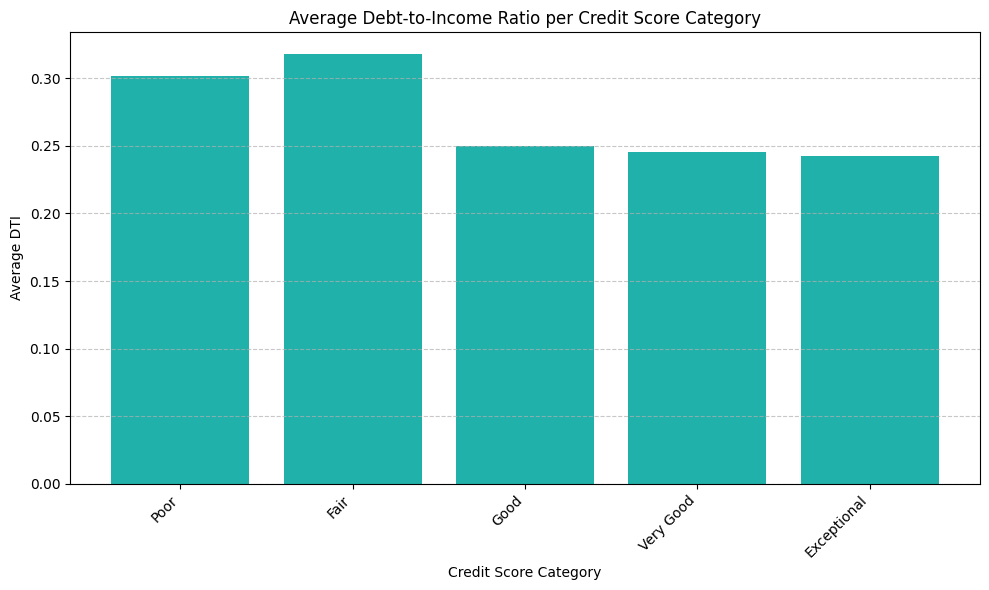

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(credit_score_agg['credit_score_category'], credit_score_agg['avg_dti'], color='lightseagreen')
plt.title('Average Debt-to-Income Ratio per Credit Score Category')
plt.xlabel('Credit Score Category')
plt.ylabel('Average DTI')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

To visualize the average non-fraudulent transaction count for each credit score category, create a bar chart using the 'credit_score_agg' DataFrame's 'avg_count_nonfraud_trx' column.



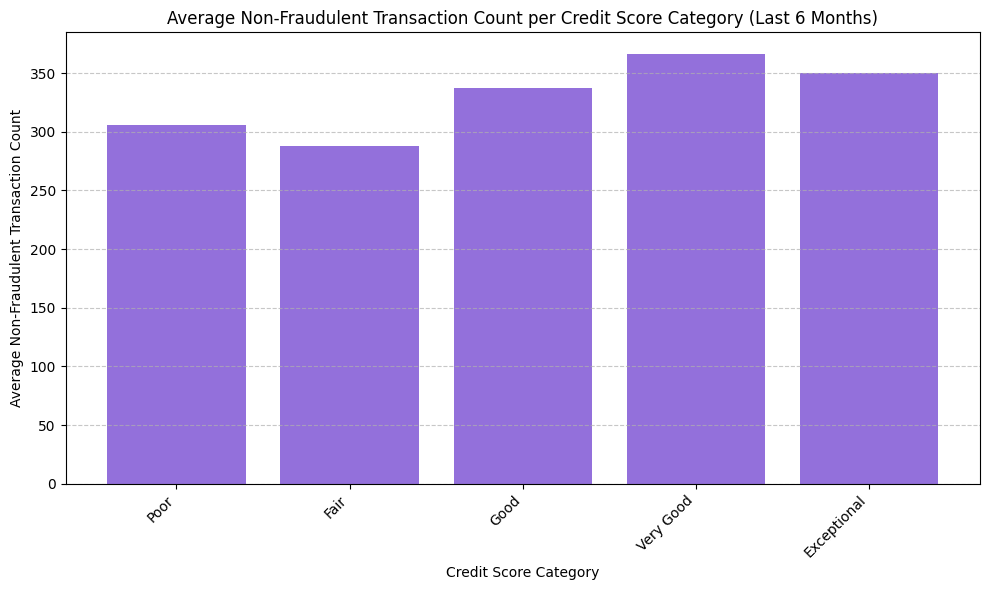

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(credit_score_agg['credit_score_category'], credit_score_agg['avg_count_nonfraud_trx'], color='mediumpurple')
plt.title('Average Non-Fraudulent Transaction Count per Credit Score Category (Last 6 Months)')
plt.xlabel('Credit Score Category')
plt.ylabel('Average Non-Fraudulent Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

To visualize the average non-fraudulent transaction amount for each credit score category, create a bar chart using the 'credit_score_agg' DataFrame's 'avg_amt_nonfraud_trx' column.



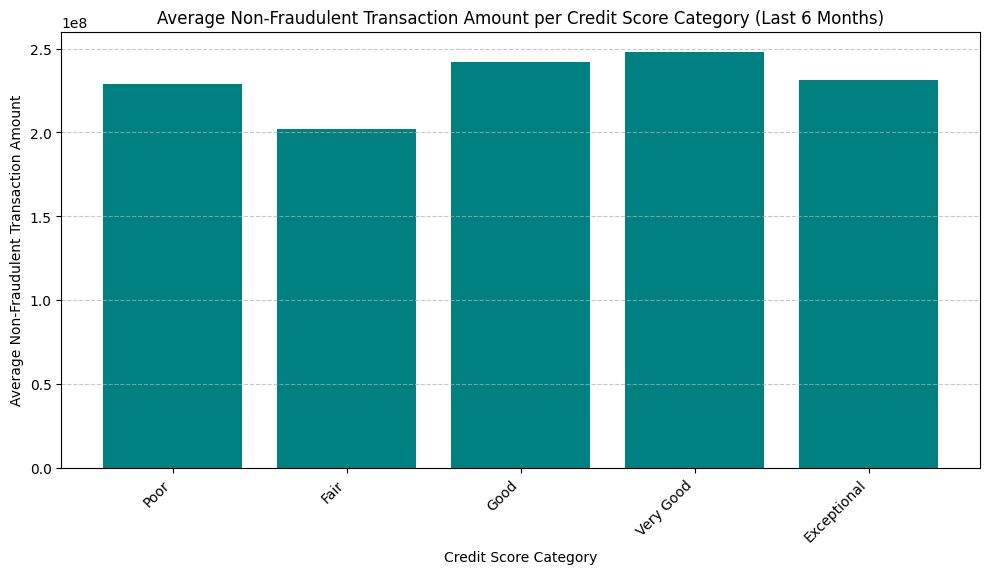

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(credit_score_agg['credit_score_category'], credit_score_agg['avg_amt_nonfraud_trx'], color='teal')
plt.title('Average Non-Fraudulent Transaction Amount per Credit Score Category (Last 6 Months)')
plt.xlabel('Credit Score Category')
plt.ylabel('Average Non-Fraudulent Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

To visualize the average fraudulent transaction count for each credit score category, create a bar chart using the 'credit_score_agg' DataFrame's 'avg_count_fraud_trx' column.



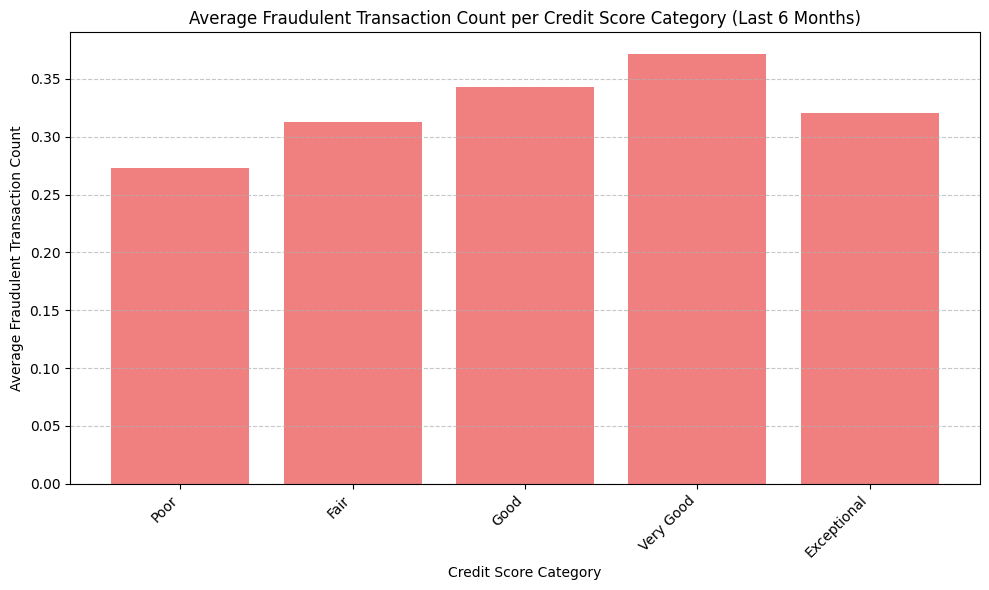

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(credit_score_agg['credit_score_category'], credit_score_agg['avg_count_fraud_trx'], color='lightcoral')
plt.title('Average Fraudulent Transaction Count per Credit Score Category (Last 6 Months)')
plt.xlabel('Credit Score Category')
plt.ylabel('Average Fraudulent Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

To visualize the average fraudulent transaction amount for each credit score category, create a bar chart using the 'credit_score_agg' DataFrame's 'avg_amt_fraud_trx' column.



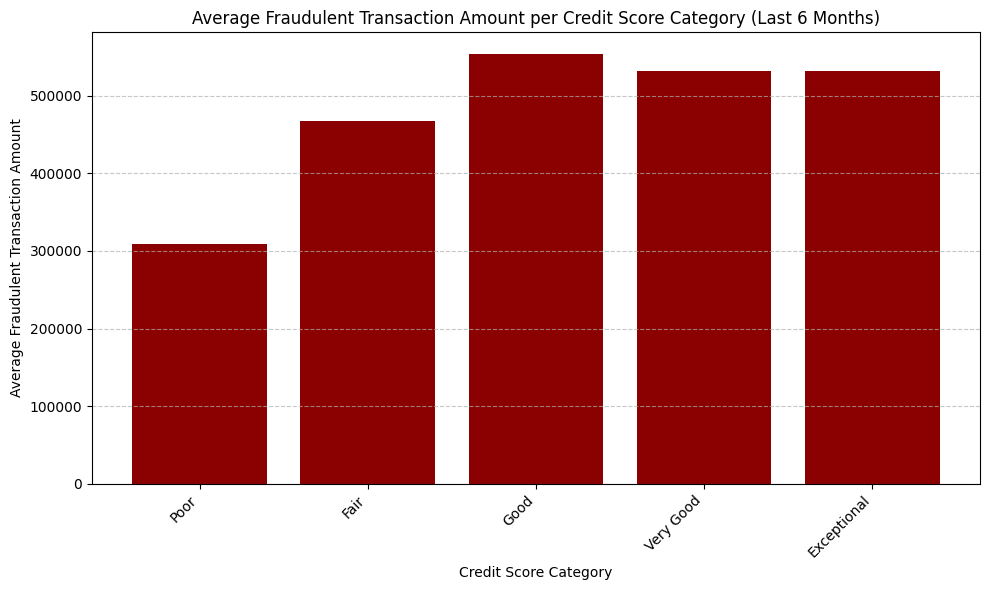

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(credit_score_agg['credit_score_category'], credit_score_agg['avg_amt_fraud_trx'], color='darkred')
plt.title('Average Fraudulent Transaction Amount per Credit Score Category (Last 6 Months)')
plt.xlabel('Credit Score Category')
plt.ylabel('Average Fraudulent Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

####Summary of DTI and Transaction Behavior by Credit Score Category

Based on the analysis of Debt-to-Income (DTI) ratios and transaction behaviors (non-fraudulent and fraudulent counts and amounts) across different credit score categories, the following key observations can be made ( Credit scores were categorized into 'Poor' (0-579), 'Fair' (580-669), 'Good' (670-739), 'Very Good' (740-799), and 'Exceptional' (800-850)) :

**1. Debt-to-Income (DTI) Ratio :**
*   **Fair** credit score category has the highest average DTI (approximately 0.318), indicating that users in this category carry a higher debt burden relative to their income.
*   **Poor** credit score category follows closely with an average DTI of about 0.302.
*   **Good**, **Very Good**, and **Exceptional** categories show progressively lower average DTI ratios, with **Exceptional** having the lowest at approximately 0.243. This aligns with expectations, as individuals with higher credit scores typically manage their debt more effectively.

**2. Non-Fraudulent Transaction Count :**
*   Users in the **Very Good** credit score category show the highest average non-fraudulent transaction count (approximately 366.56 transactions).
*   **Exceptional** and **Good** categories also have high average counts, suggesting that users with better credit scores tend to use their cards more frequently for legitimate transactions.
*   **Poor** and **Fair** categories have lower average non-fraudulent transaction counts, implying less frequent card usage or a preference for other payment methods.

**3. Non-Fraudulent Transaction Amount :**
*   **Very Good** credit score category also leads in average non-fraudulent transaction amount (approximately 2.478e+08), indicating that these users not only transact frequently but also make larger legitimate purchases.
*   Similar to counts, **Good** and **Exceptional** categories exhibit high average non-fraudulent transaction amounts, reinforcing the idea that higher credit score users drive significant legitimate transaction volume and value.
*   **Poor** and **Fair** categories have lower average non-fraudulent transaction amounts.

**4. Fraudulent Transaction Count :**
*   The average fraudulent transaction counts are relatively low across all categories, but there's a slight increase from **Poor** to **Good** and **Very Good** categories, with **Very Good** showing the highest average (approximately 0.372). This might suggest that fraudsters target cards from users with better credit scores, possibly due to higher credit limits or perceived higher value.

**5. Fraudulent Transaction Amount :**
*   The average fraudulent transaction amounts are also relatively small, but **Good** and **Exceptional** categories show slightly higher average fraudulent amounts (around 5.54e+05 and 5.31e+05, respectively). This could imply that when fraud occurs in these higher credit score categories, it involves slightly larger monetary values.

**Overall Insights:**
*   There's a clear inverse relationship between credit score and DTI: as credit scores improve, DTI ratios decrease, suggesting better financial health.
*   Users with higher credit scores (**Good**, **Very Good**, **Exceptional**) are generally more active with their cards, having both higher non-fraudulent transaction counts and amounts. They represent a significant portion of legitimate transaction volume and value.
*   While fraud is present across all categories, there's a nuanced pattern. Higher credit score categories might experience slightly more frequent or higher-value fraudulent incidents, possibly due to higher credit limits making them more attractive targets. However, the overall fraud amounts are very small compared to non-fraudulent amounts, which is a positive sign.

6f.Present the findings in a line chart to see the relationship between user age and credit limit (Hint:Sum the credit limit by user age then devide by total number, trim the user age to prevent small and volatile data in the higher age).

Aggregate the 'df_merged' DataFrame by 'age' to calculate the average 'credit_limit' for each age, trimming the age range to exclude very old ages to prevent volatile data. Prepare the data for visualization as requested, group the 'df_merged' DataFrame by 'age' and calculate the mean of 'credit_limit'. Then, create a line chart to visualize the relationship between user age and average credit limit, including appropriate titles and axis labels. Finally, summarize the key findings from the line chart, highlighting any observed trends or relationships.

In [ ]:
avg_credit_limit_by_age = df_merged.groupby('age')['credit_limit'].mean().reset_index()
display(avg_credit_limit_by_age.head())

,age,credit_limit
0,17,4.609672e+07
1,18,4.808706e+07
2,19,4.789100e+07
3,20,4.886413e+07
4,21,4.057080e+07


To filter out potential volatility from very old age groups with fewer data points, filter the 'avg_credit_limit_by_age' DataFrame to include only ages up to 85.



In [ ]:
avg_credit_limit_by_age_trimmed = avg_credit_limit_by_age[avg_credit_limit_by_age['age'] <= 85]
display(avg_credit_limit_by_age_trimmed.head())
display(avg_credit_limit_by_age_trimmed.tail())

,age,credit_limit
0,17,4.609672e+07
1,18,4.808706e+07
2,19,4.789100e+07
3,20,4.886413e+07
4,21,4.057080e+07


,age,credit_limit
64,81,8.785650e+07
65,82,1.058914e+08
66,83,1.590255e+08
67,84,8.785744e+07
68,85,9.649889e+07


To visualize the relationship between user age and average credit limit, create a line chart using the `avg_credit_limit_by_age_trimmed` DataFrame.



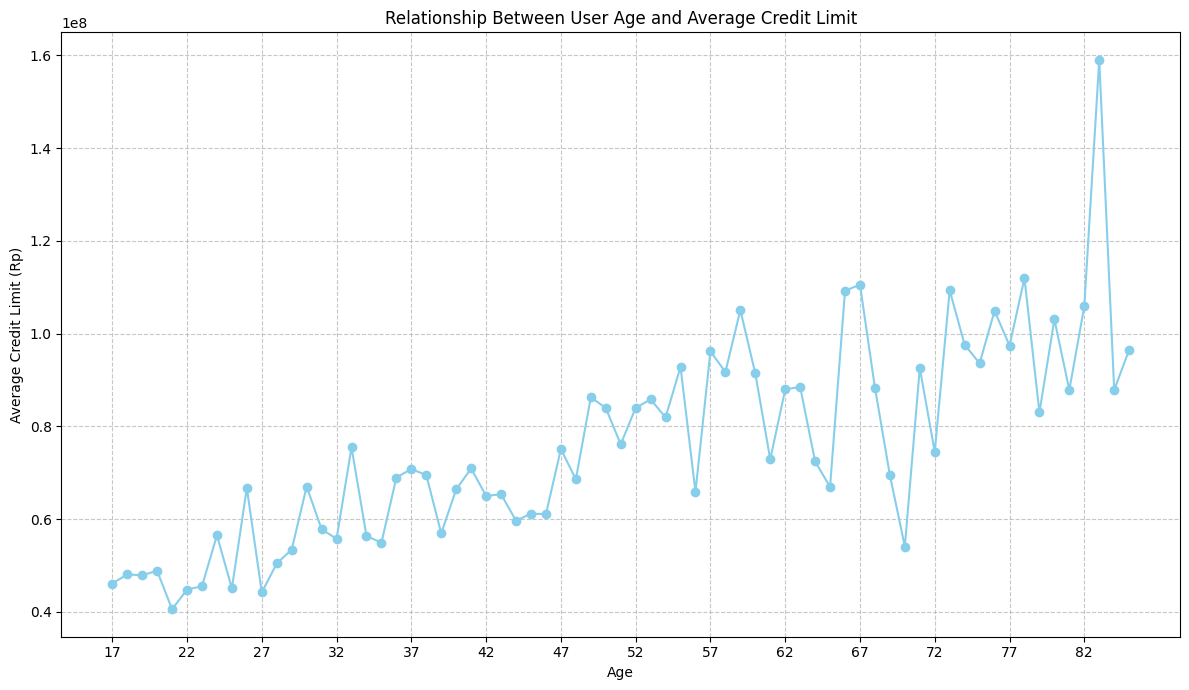

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(avg_credit_limit_by_age_trimmed['age'], avg_credit_limit_by_age_trimmed['credit_limit'], marker='o', linestyle='-', color='skyblue')
plt.title('Relationship Between User Age and Average Credit Limit')
plt.xlabel('Age')
plt.ylabel('Average Credit Limit (Rp)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(avg_credit_limit_by_age_trimmed['age'].unique()[::5]) # Show x-ticks every 5 years
plt.tight_layout()
plt.show()